In [1]:
import os
os.getcwd()

'C:\\Users\\denni\\desktop\\VLSI - shared\\interface'

In [7]:
# Convert image dataset into black and white 28x28 px
import os
import numpy as np
from PIL import Image

# ===============================================
# CONFIG
# ===============================================
IMAGE_DIR = "cats"   # <-- change to your folder
OUTPUT_MEM = "cats_28x28_bw.mem"
IMG_SIZE = (28, 28)
THRESHOLD = 128   # brightness cutoff (0–255)

# ===============================================
# PROCESS & SAVE DIRECTLY
# ===============================================
with open(OUTPUT_MEM, "w") as f:

    for filename in os.listdir(IMAGE_DIR):
        
        if filename.lower().endswith((".jpg", ".jpeg", ".png", ".bmp")):
            img_path = os.path.join(IMAGE_DIR, filename)

            # Load + grayscale
            img = Image.open(img_path).convert("L")

            # Resize
            img = img.resize(IMG_SIZE)

            # Convert to numpy
            pixels = np.array(img)

            # Binarize: 0 = black, 1 = white
            bw = (pixels > THRESHOLD).astype(int)

            # Write result
            f.write(f"# Image: {filename}\n")

            for row in bw:
                row_str = " ".join(str(v) for v in row)  # 28 values (0 or 1)
                f.write(row_str + "\n")

            f.write("\n")

print("Saved:", OUTPUT_MEM)


Saved: cats_28x28_bw.mem


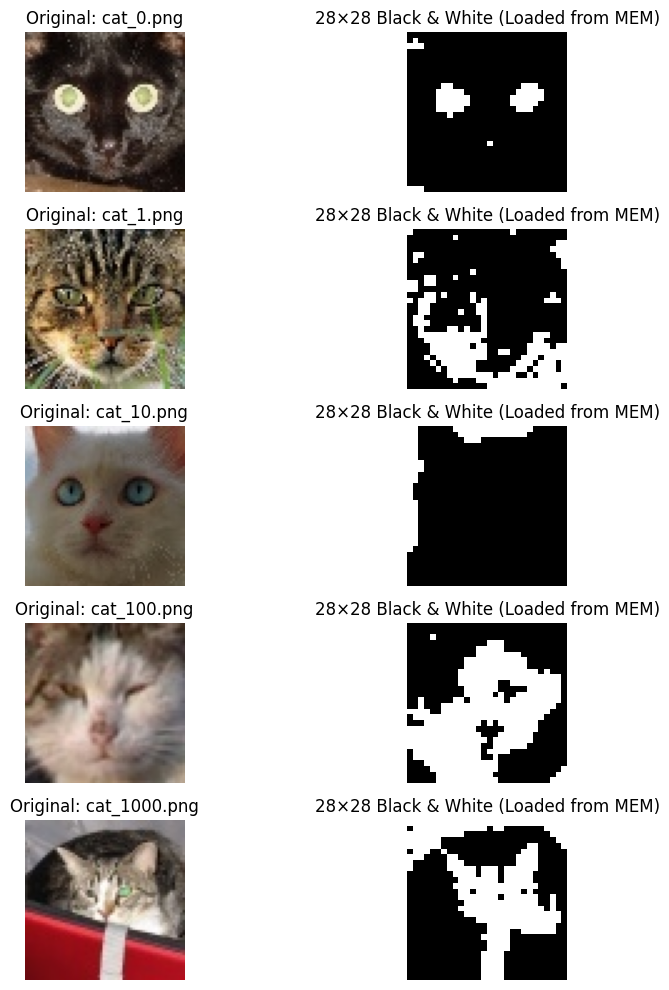

In [12]:
#load before and after image
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# ===============================
# CONFIG
# ===============================
IMAGE_DIR = "cats"    # original images
MEM_FILE  = "cats_28x28_bw.mem"               # processed file

# ===============================
# FUNCTION: Load processed images
# ===============================
def load_mem_images(path):
    images = []
    current = []

    with open(path, "r") as f:
        for line in f:
            line = line.strip()

            if line.startswith("# Image:"):
                img_name = line.replace("# Image:", "").strip()

            elif line == "":
                if current:
                    images.append((img_name, np.array(current)))
                    current = []
            else:
                row = [int(x) for x in line.split()]
                current.append(row)

    return images


# ===============================
# LOAD .MEM BINARY IMAGES
# ===============================
bw_images = load_mem_images(MEM_FILE)

# TAKE FIRST 5 SAMPLES
samples = bw_images[:5]

# ===============================
# DISPLAY BEFORE & AFTER
# ===============================
plt.figure(figsize=(10, 10))

for i, (img_name, bw_data) in enumerate(samples):
    
    # ----- Load original (before) -----
    orig_path = os.path.join(IMAGE_DIR, img_name)
    original = Image.open(orig_path)

    # ----- After (28x28 binary) -----
    bw_array = bw_data.astype(int)

    # --- Plot original ---
    plt.subplot(5, 2, i*2 + 1)
    plt.imshow(original)
    plt.title(f"Original: {img_name}")
    plt.axis('off')

    # --- Plot binary version ---
    plt.subplot(5, 2, i*2 + 2)
    plt.imshow(bw_array, cmap='gray')
    plt.title("28×28 Black & White (Loaded from MEM)")
    plt.axis('off')

plt.tight_layout()
plt.show()



Total baris     : 895290
Total gambar    : 31974

=== Statistik Pixel 1 ===
Rata-rata jumlah 1 : 294.02686557828235
Std dev jumlah 1   : 158.66199610696526
Upper bound (mean+std)  : 452.6888616852476
Lower bound (mean-std)  : 135.3648694713171


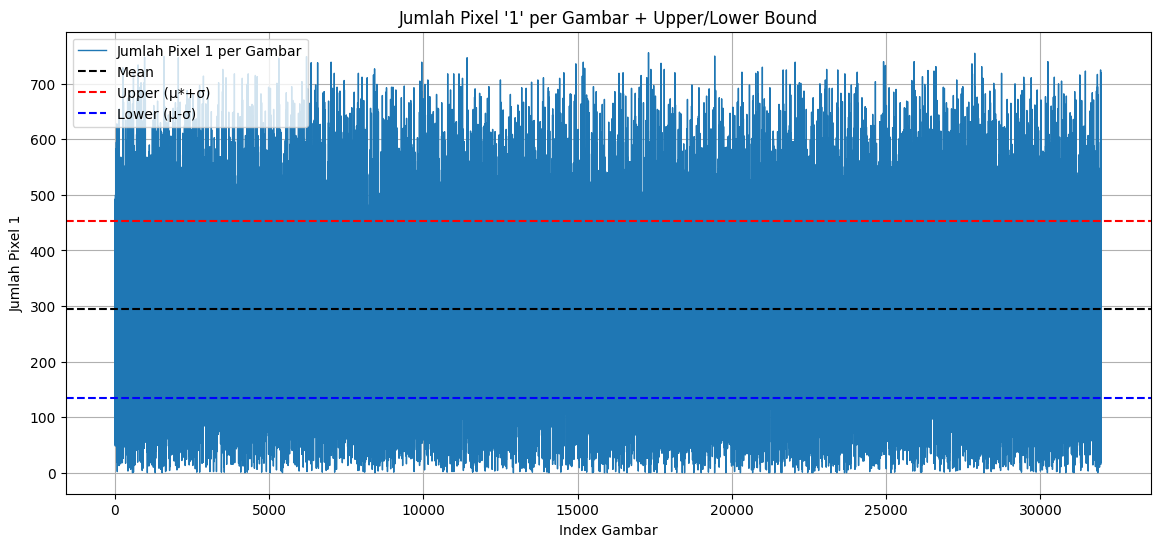

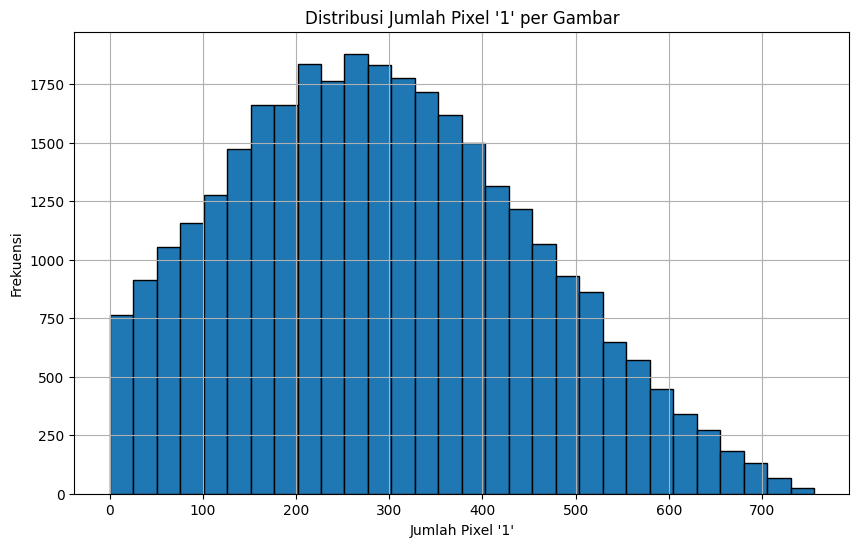


=== Probabilitas jumlah pixel 1 lebih dari threshold ===
P(X > 128) = 0.8333958841558766
P(X > 256) = 0.5652717833239507
P(X > 512) = 0.10101957840745605


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# CONFIG
PATH = "cats_28x28_bw.mem"

# ------------------------------------
# 1. Load file .mem
# ------------------------------------
def load_mem_file(path):
    with open(path, "r") as f:
        lines = [line.strip() for line in f.readlines()]
    return lines

lines = load_mem_file(PATH)

# ------------------------------------
# 2. Dataset Info
# ------------------------------------
rows_per_image = 28
pixels_per_image = 28 * 28

num_images = len(lines) // rows_per_image
print("Total baris     :", len(lines))
print("Total gambar    :", num_images)

# ------------------------------------
# 3. Hitung jumlah 1 dan 0 per gambar
# ------------------------------------
ones_per_image = []
zeros_per_image = []

for i in range(num_images):
    start = i * rows_per_image
    end = start + rows_per_image
    img_lines = lines[start:end]

    img_bits = "".join(img_lines)

    one_count = img_bits.count("1")
    zero_count = img_bits.count("0")

    ones_per_image.append(one_count)
    zeros_per_image.append(zero_count)

# ------------------------------------
# 4. Statistik dasar
# ------------------------------------
mean_ones = np.mean(ones_per_image)
std_ones = np.std(ones_per_image)

upper_bound = mean_ones + std_ones
lower_bound = mean_ones - std_ones

print("\n=== Statistik Pixel 1 ===")
print("Rata-rata jumlah 1 :", mean_ones)
print("Std dev jumlah 1   :", std_ones)
print("Upper bound (mean+std)  :", upper_bound)
print("Lower bound (mean-std)  :", lower_bound)

# ------------------------------------
# 5. Plot jumlah pixel 1 per gambar + bound
# ------------------------------------
plt.figure(figsize=(14,6))
plt.plot(ones_per_image, label="Jumlah Pixel 1 per Gambar", linewidth=1)

plt.axhline(mean_ones, color='black', linestyle='--', label='Mean')
plt.axhline(upper_bound, color='red', linestyle='--', label='Upper (μ*+σ)')
plt.axhline(lower_bound, color='blue', linestyle='--', label='Lower (μ-σ)')

plt.title("Jumlah Pixel '1' per Gambar + Upper/Lower Bound")
plt.xlabel("Index Gambar")
plt.ylabel("Jumlah Pixel 1")
plt.grid(True)
plt.legend()
plt.show()

# ------------------------------------
# 6. Plot distribusi pixel 1 (Histogram)
# ------------------------------------
plt.figure(figsize=(10,6))
plt.hist(ones_per_image, bins=30, edgecolor='black')

plt.title("Distribusi Jumlah Pixel '1' per Gambar")
plt.xlabel("Jumlah Pixel '1'")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()

# ------------------------------------
# 7. Probabilitas X > 128, 256, 512
# ------------------------------------
thresholds = [128, 256, 512]
probabilities_gt = {}

for t in thresholds:
    count = sum(1 for x in ones_per_image if x > t)
    prob = count / num_images
    probabilities_gt[t] = prob

print("\n=== Probabilitas jumlah pixel 1 lebih dari threshold ===")
for t in thresholds:
    print(f"P(X > {t}) =", probabilities_gt[t])



In [20]:
# Data Cleansing to save memory
import numpy as np

# CONFIG
THRESHOLD = 500
PATH = "cats_28x28_bw.mem"
OUTPUT_PATH = "cats_cleaned.mem"

# ------------------------------------
# 1. Load file .mem
# ------------------------------------
def load_mem_file(path):
    with open(path, "r") as f:
        lines = [line.strip() for line in f.readlines()]
    return lines

lines = load_mem_file(PATH)

# ------------------------------------
# 2. Preprocess: remove header lines
# ------------------------------------
clean_raw = []
for line in lines:
    if line.startswith("#"):  
        continue   # skip: "# Image: cat_x.png"
    if line.strip() == "":
        continue   # skip empty lines
    clean_raw.append(line)

print("Total non-header lines:", len(clean_raw))

# ------------------------------------
# 3. Compute total images
# ------------------------------------
rows_per_image = 28
num_images = len(clean_raw) // rows_per_image
print("Images detected:", num_images)

# ------------------------------------
# 4. Clean and validate each image
# ------------------------------------
cleaned_lines = []
valid_count = 0

for i in range(num_images):
    start = i * rows_per_image
    end = start + rows_per_image
    img_lines = clean_raw[start:end]

    filtered_rows = []

    for row in img_lines:
        # Split by spaces → expect 28 numbers
        parts = row.split()

        # Remove non-binary characters if any
        parts = [p for p in parts if p in ("0", "1")]

        if len(parts) != 28:
            print(f"[WARNING] Bad row length in image {i}, skipping image...")
            filtered_rows = None
            break

        # Convert back into string without spaces
        filtered_rows.append("".join(parts))

    if filtered_rows is None:
        continue

    # Count ones in entire 784-bit image
    img_bits = "".join(filtered_rows)
    one_count = img_bits.count("1")

    if one_count < THRESHOLD:
        cleaned_lines.extend(filtered_rows)
        valid_count += 1

print("\nValid images saved:", valid_count)

# ------------------------------------
# 5. Write output .mem
# ------------------------------------
with open(OUTPUT_PATH, "w") as f:
    for line in cleaned_lines:
        f.write(line + "\n")

print("\nOutput saved:", OUTPUT_PATH)
print("Total cleaned lines:", len(cleaned_lines))
print("Images left:", len(cleaned_lines) // rows_per_image)


Total non-header lines: 835604
Images detected: 29843

Valid images saved: 24402

Output saved: cats_cleaned.mem
Total cleaned lines: 683256
Images left: 24402


Loading cleaned dataset...
Total cleaned images: 24402
Dataset tensor shape: torch.Size([24402, 784])
Using device: cuda
Start training GAN...
[Epoch 1/50]  LossD=0.0129  LossG=5.9875
[Epoch 2/50]  LossD=0.0015  LossG=9.7425
[Epoch 3/50]  LossD=0.0431  LossG=6.5064
[Epoch 4/50]  LossD=0.0015  LossG=8.3321
[Epoch 5/50]  LossD=0.0024  LossG=7.3435
[Epoch 6/50]  LossD=0.0083  LossG=7.0388
[Epoch 7/50]  LossD=0.0014  LossG=9.8255
[Epoch 8/50]  LossD=0.0034  LossG=6.6601
[Epoch 9/50]  LossD=0.0023  LossG=11.2845
[Epoch 10/50]  LossD=0.0189  LossG=8.6870


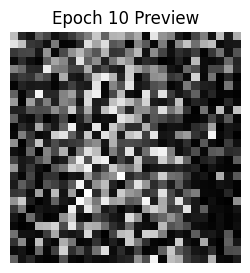

[Epoch 11/50]  LossD=0.1270  LossG=4.1453
[Epoch 12/50]  LossD=0.3623  LossG=5.1828
[Epoch 13/50]  LossD=0.1670  LossG=4.8026
[Epoch 14/50]  LossD=0.0643  LossG=3.8136
[Epoch 15/50]  LossD=0.1038  LossG=4.1990
[Epoch 16/50]  LossD=0.2254  LossG=4.0524
[Epoch 17/50]  LossD=0.4110  LossG=3.2067
[Epoch 18/50]  LossD=0.0812  LossG=3.0102
[Epoch 19/50]  LossD=0.3927  LossG=2.6310
[Epoch 20/50]  LossD=0.5771  LossG=1.5532


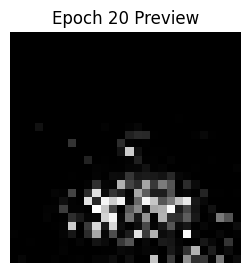

[Epoch 21/50]  LossD=0.6161  LossG=3.0895
[Epoch 22/50]  LossD=0.4542  LossG=1.9678
[Epoch 23/50]  LossD=0.2506  LossG=3.5510
[Epoch 24/50]  LossD=0.1757  LossG=3.3899
[Epoch 25/50]  LossD=0.2548  LossG=2.2569
[Epoch 26/50]  LossD=0.6009  LossG=2.1096
[Epoch 27/50]  LossD=0.8031  LossG=2.0083
[Epoch 28/50]  LossD=0.5632  LossG=2.8323
[Epoch 29/50]  LossD=0.6192  LossG=3.5831
[Epoch 30/50]  LossD=0.4278  LossG=1.9812


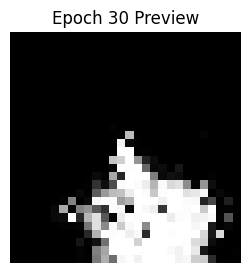

[Epoch 31/50]  LossD=0.1523  LossG=3.4574
[Epoch 32/50]  LossD=0.8018  LossG=3.1483
[Epoch 33/50]  LossD=0.4588  LossG=2.5550
[Epoch 34/50]  LossD=0.2231  LossG=2.5655
[Epoch 35/50]  LossD=0.9051  LossG=2.3257
[Epoch 36/50]  LossD=0.6846  LossG=2.3175
[Epoch 37/50]  LossD=0.1748  LossG=2.1727
[Epoch 38/50]  LossD=0.4625  LossG=3.1656
[Epoch 39/50]  LossD=0.4674  LossG=2.3232
[Epoch 40/50]  LossD=0.3815  LossG=2.8813


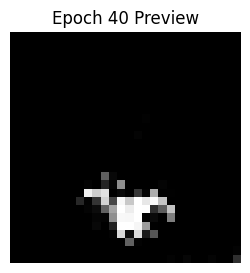

[Epoch 41/50]  LossD=0.8407  LossG=2.5528
[Epoch 42/50]  LossD=0.1981  LossG=2.5221
[Epoch 43/50]  LossD=0.4771  LossG=2.3173
[Epoch 44/50]  LossD=0.1427  LossG=2.2566
[Epoch 45/50]  LossD=0.4012  LossG=2.9843
[Epoch 46/50]  LossD=0.2929  LossG=2.7771
[Epoch 47/50]  LossD=0.3640  LossG=2.2476
[Epoch 48/50]  LossD=0.3481  LossG=2.4253
[Epoch 49/50]  LossD=0.3909  LossG=2.2407
[Epoch 50/50]  LossD=0.2846  LossG=3.3104


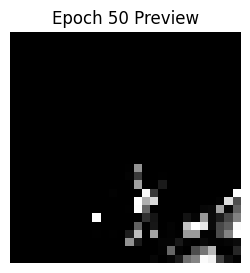

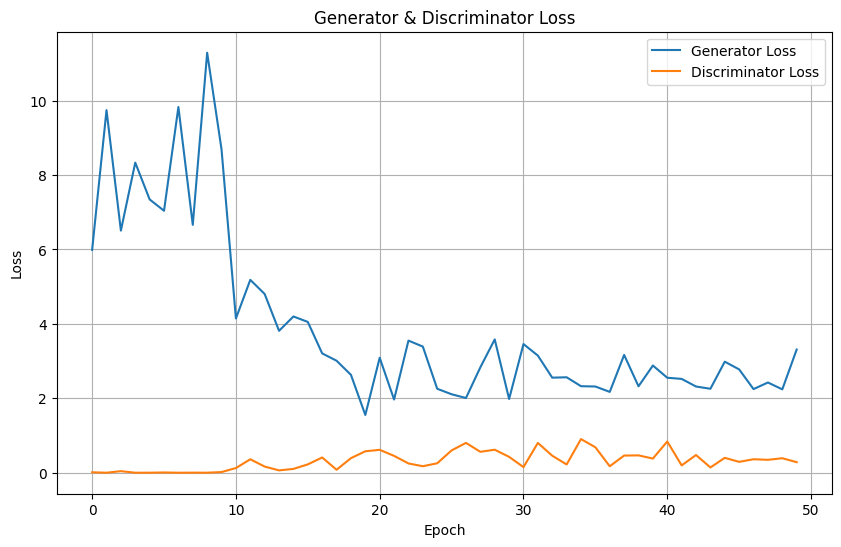

Loss plot saved as loss_plot.png
Exported: G_l1
Exported: G_l2
Exported: G_l3
Exported: D_l1
Exported: D_l2
Exported: D_l3
Exported: D_l4
All weights exported successfully!


In [22]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from PIL import Image
import matplotlib.pyplot as plt

# ============================================================
# CONFIG
# ============================================================

CONFIG = {
    "DATASET": "cats_cleaned.mem",
    "EPOCHS": 50,
    "BATCH_SIZE": 64,
    "LATENT": 64,

    # Output folders
    "FOLDER_GENERATOR": "weights_generator",
    "FOLDER_DISCRIMINATOR": "weights_discriminator",
    "FOLDER_PREVIEW": "preview_images"     # <-- display every 10 epochs
}

os.makedirs(CONFIG["FOLDER_GENERATOR"], exist_ok=True)
os.makedirs(CONFIG["FOLDER_DISCRIMINATOR"], exist_ok=True)
os.makedirs(CONFIG["FOLDER_PREVIEW"], exist_ok=True)
os.makedirs("progress", exist_ok=True)  # still save grid every epoch


# ============================================================
# 1. LOAD CLEANED DATASET (.mem)
# ============================================================

def load_mem(path):
    with open(path, "r") as f:
        return [line.strip() for line in f.readlines()]

print("Loading cleaned dataset...")
clean_lines = load_mem(CONFIG["DATASET"])
num_images = len(clean_lines) // 28
print("Total cleaned images:", num_images)

dataset = []
for i in range(num_images):
    block = clean_lines[i*28:(i+1)*28]
    bits = "".join(block)
    arr = np.array([int(b) for b in bits], dtype=np.float32)
    arr = arr * 2 - 1
    dataset.append(arr)

dataset = torch.tensor(np.array(dataset))
print("Dataset tensor shape:", dataset.shape)


# ============================================================
# 2. GENERATOR
# ============================================================

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(CONFIG["LATENT"], 256)
        self.l2 = nn.Linear(256, 256)
        self.l3 = nn.Linear(256, 784)
        self.act = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, z):
        x = self.act(self.l1(z))
        x = self.act(self.l2(x))
        return self.tanh(self.l3(x))


# ============================================================
# 3. DISCRIMINATOR
# ============================================================

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 256)
        self.l2 = nn.Linear(256, 256)
        self.l3 = nn.Linear(256, 256)
        self.l4 = nn.Linear(256, 1)
        self.leaky = nn.LeakyReLU(0.2)
        self.sig = nn.Sigmoid()

    def forward(self, x):
        x = self.leaky(self.l1(x))
        x = self.leaky(self.l2(x))
        x = self.leaky(self.l3(x))
        return self.sig(self.l4(x))


# ============================================================
# 4. TRAINING SETUP
# ============================================================

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

G = Generator().to(device)
D = Discriminator().to(device)

criterion = nn.BCELoss()
optim_G = optim.Adam(G.parameters(), lr=0.0002)
optim_D = optim.Adam(D.parameters(), lr=0.0002)

dataset_gpu = dataset.to(device)

loss_G_list = []
loss_D_list = []


# ============================================================
# IMAGE SAVER
# ============================================================

def save_grid(imgs, filename):
    imgs = imgs.cpu().detach().numpy().reshape(-1, 28, 28)
    img_big = Image.new("L", (28*3, 28*3))
    idx = 0
    for r in range(3):
        for c in range(3):
            tile = (imgs[idx] + 1) / 2 * 255
            tile = tile.astype(np.uint8)
            im = Image.fromarray(tile, mode="L")
            img_big.paste(im, (c*28, r*28))
            idx += 1
    img_big.save(filename)


# ============================================================
# 5. TRAIN
# ============================================================

print("Start training GAN...")

fixed_z = torch.randn(9, CONFIG["LATENT"]).to(device)

for epoch in range(CONFIG["EPOCHS"]):

    perm = torch.randperm(len(dataset_gpu))
    dataset_gpu = dataset_gpu[perm]

    for i in range(0, len(dataset_gpu), CONFIG["BATCH_SIZE"]):

        real = dataset_gpu[i:i+CONFIG["BATCH_SIZE"]]
        b = real.shape[0]

        real_lbl = torch.ones(b, 1).to(device)
        fake_lbl = torch.zeros(b, 1).to(device)

        # ----- Train D -----
        z = torch.randn(b, CONFIG["LATENT"]).to(device)
        fake = G(z).detach()

        loss_D = criterion(D(real), real_lbl) + criterion(D(fake), fake_lbl)

        optim_D.zero_grad()
        loss_D.backward()
        optim_D.step()

        # ----- Train G -----
        z = torch.randn(b, CONFIG["LATENT"]).to(device)
        gen = G(z)
        loss_G = criterion(D(gen), real_lbl)

        optim_G.zero_grad()
        loss_G.backward()
        optim_G.step()

    loss_G_list.append(loss_G.item())
    loss_D_list.append(loss_D.item())

    print(f"[Epoch {epoch+1}/{CONFIG['EPOCHS']}]  LossD={loss_D.item():.4f}  LossG={loss_G.item():.4f}")

    # Save 9 images every epoch (to progress/)
    samples = G(fixed_z)
    save_grid(samples, f"progress/epoch_{epoch+1}.png")

    # DISPLAY image only every 10 epochs
    if (epoch + 1) % 10 == 0:
        img_path = f"{CONFIG['FOLDER_PREVIEW']}/preview_epoch_{epoch+1}.png"
        save_grid(samples, img_path)
    
        # DISPLAY IMAGE IN NOTEBOOK
        img_np = samples[0].detach().cpu().numpy().reshape(28, 28)
        plt.figure(figsize=(3, 3))
        plt.imshow((img_np + 1) / 2, cmap="gray")
        plt.title(f"Epoch {epoch+1} Preview")
        plt.axis("off")
        plt.show()



# ============================================================
# 6. PLOT LOSSES
# ============================================================

plt.figure(figsize=(10,6))
plt.plot(loss_G_list, label="Generator Loss")
plt.plot(loss_D_list, label="Discriminator Loss")
plt.title("Generator & Discriminator Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.savefig("loss_plot.png")
plt.show()

print("Loss plot saved as loss_plot.png")


# ============================================================
# 7. WEIGHT EXPORT (Q8.8) TO FOLDERS
# ============================================================

def export_layer_hex(layer, folder, name):
    W = layer.weight.data.cpu().numpy().flatten()
    B = layer.bias.data.cpu().numpy().flatten()

    os.makedirs(folder, exist_ok=True)

    with open(f"{folder}/{name}_weight.hex", "w") as fw:
        for v in W:
            q = int(v * 256)
            fw.write(f"{(q & 0xFFFF):04X}\n")

    with open(f"{folder}/{name}_bias.hex", "w") as fb:
        for v in B:
            q = int(v * 256)
            fb.write(f"{(q & 0xFFFF):04X}\n")

    print("Exported:", name)


# GENERATOR
export_layer_hex(G.l1, CONFIG["FOLDER_GENERATOR"], "G_l1")
export_layer_hex(G.l2, CONFIG["FOLDER_GENERATOR"], "G_l2")
export_layer_hex(G.l3, CONFIG["FOLDER_GENERATOR"], "G_l3")

# DISCRIMINATOR
export_layer_hex(D.l1, CONFIG["FOLDER_DISCRIMINATOR"], "D_l1")
export_layer_hex(D.l2, CONFIG["FOLDER_DISCRIMINATOR"], "D_l2")
export_layer_hex(D.l3, CONFIG["FOLDER_DISCRIMINATOR"], "D_l3")
export_layer_hex(D.l4, CONFIG["FOLDER_DISCRIMINATOR"], "D_l4")

print("All weights exported successfully!")


Loading cleaned dataset...
Total cleaned images: 24402
Dataset tensor shape: torch.Size([24402, 784])
Using device: cuda
Start training WGAN-LP...
[Epoch 1/50] Critic=-20.2942  Gen=-7.8996
[Epoch 2/50] Critic=-11.6233  Gen=-2.6027
[Epoch 3/50] Critic=-11.6689  Gen=-2.2092
[Epoch 4/50] Critic=-11.4523  Gen=-0.7572
[Epoch 5/50] Critic=-10.1879  Gen=1.2904
[Epoch 6/50] Critic=-12.9225  Gen=0.0298
[Epoch 7/50] Critic=-11.0033  Gen=-0.4149
[Epoch 8/50] Critic=-10.2461  Gen=1.7400
[Epoch 9/50] Critic=-10.0655  Gen=2.3541
[Epoch 10/50] Critic=-11.5960  Gen=3.9730


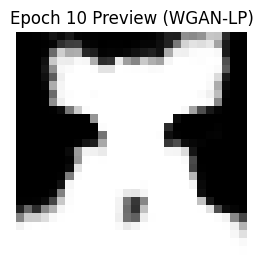

[Epoch 11/50] Critic=-9.5247  Gen=8.8681
[Epoch 12/50] Critic=-8.2405  Gen=5.7359
[Epoch 13/50] Critic=-10.5053  Gen=8.7510
[Epoch 14/50] Critic=-8.8688  Gen=4.1376
[Epoch 15/50] Critic=-8.4869  Gen=6.8250
[Epoch 16/50] Critic=-8.0273  Gen=5.7044
[Epoch 17/50] Critic=-9.0425  Gen=6.2997
[Epoch 18/50] Critic=-13.1990  Gen=10.3482
[Epoch 19/50] Critic=-10.0514  Gen=6.1985
[Epoch 20/50] Critic=-9.4331  Gen=9.8600


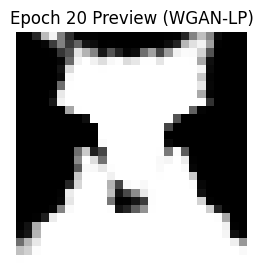

[Epoch 21/50] Critic=-10.7381  Gen=9.7358
[Epoch 22/50] Critic=-11.1651  Gen=8.7040
[Epoch 23/50] Critic=-8.7478  Gen=9.6391
[Epoch 24/50] Critic=-9.7748  Gen=8.6612
[Epoch 25/50] Critic=-10.4401  Gen=8.7411
[Epoch 26/50] Critic=-10.5442  Gen=9.1645
[Epoch 27/50] Critic=-9.0727  Gen=8.9755
[Epoch 28/50] Critic=-10.0350  Gen=7.9119
[Epoch 29/50] Critic=-9.2064  Gen=6.8384
[Epoch 30/50] Critic=-8.8555  Gen=8.7195


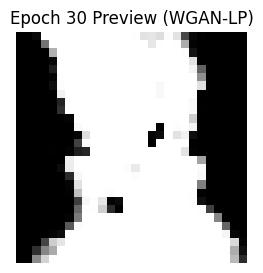

[Epoch 31/50] Critic=-7.1278  Gen=6.1680
[Epoch 32/50] Critic=-10.0534  Gen=10.3642
[Epoch 33/50] Critic=-7.6720  Gen=8.2227
[Epoch 34/50] Critic=-8.0601  Gen=9.9492
[Epoch 35/50] Critic=-11.6247  Gen=9.5559
[Epoch 36/50] Critic=-6.8066  Gen=8.6668
[Epoch 37/50] Critic=-8.8677  Gen=9.3543
[Epoch 38/50] Critic=-8.5728  Gen=8.8272
[Epoch 39/50] Critic=-9.1427  Gen=7.9706
[Epoch 40/50] Critic=-6.9131  Gen=7.7002


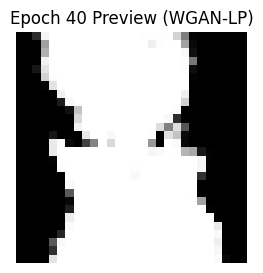

[Epoch 41/50] Critic=-10.1484  Gen=9.1435
[Epoch 42/50] Critic=-11.0448  Gen=10.3098
[Epoch 43/50] Critic=-8.3229  Gen=8.2067
[Epoch 44/50] Critic=-8.5662  Gen=7.6784
[Epoch 45/50] Critic=-8.5251  Gen=9.1013
[Epoch 46/50] Critic=-9.7281  Gen=10.0892
[Epoch 47/50] Critic=-9.2996  Gen=9.5028
[Epoch 48/50] Critic=-7.1816  Gen=8.1435
[Epoch 49/50] Critic=-8.4508  Gen=9.4431
[Epoch 50/50] Critic=-12.0005  Gen=9.3447


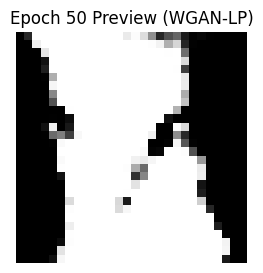

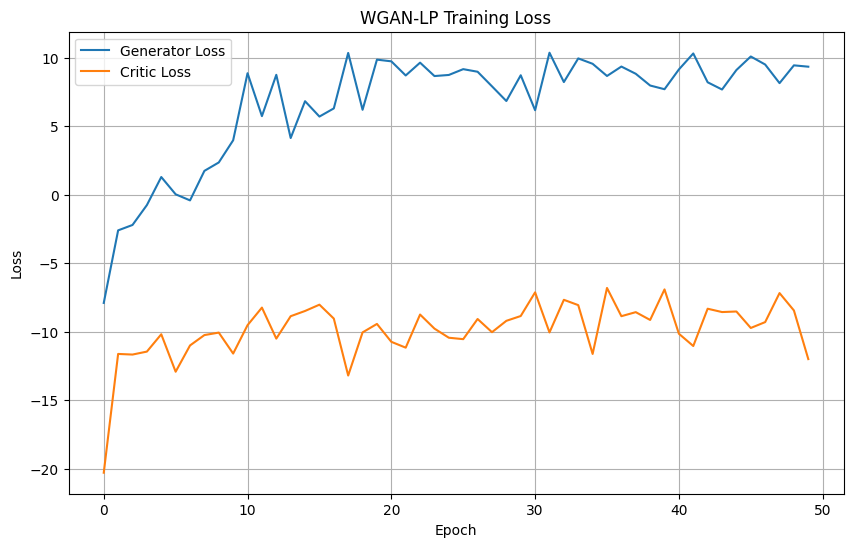

Loss plot saved as loss_wgan_lp.png
Exported: G_l1
Exported: G_l2
Exported: G_l3
Exported: C_l1
Exported: C_l2
Exported: C_l3
Exported: C_l4
All weights exported (Q8.8).


In [23]:
#WGAN version
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from PIL import Image
import matplotlib.pyplot as plt

# ============================================================
# CONFIG
# ============================================================

CONFIG = {
    "DATASET": "cats_cleaned.mem",
    "EPOCHS": 50,
    "BATCH_SIZE": 64,
    "LATENT": 64,

    "FOLDER_GENERATOR": "WGAN_weights_generator",
    "FOLDER_DISCRIMINATOR": "WGAN_weights_discriminator",
    "FOLDER_PREVIEW": "WGAN_preview_images"
}

os.makedirs(CONFIG["FOLDER_GENERATOR"], exist_ok=True)
os.makedirs(CONFIG["FOLDER_DISCRIMINATOR"], exist_ok=True)
os.makedirs(CONFIG["FOLDER_PREVIEW"], exist_ok=True)
os.makedirs("progress", exist_ok=True)

# ============================================================
# 1. LOAD DATASET (.mem → tensor)
# ============================================================

def load_mem(path):
    with open(path, "r") as f:
        return [line.strip() for line in f.readlines()]

print("Loading cleaned dataset...")
clean_lines = load_mem(CONFIG["DATASET"])
num_images = len(clean_lines) // 28
print("Total cleaned images:", num_images)

dataset = []
for i in range(num_images):
    block = clean_lines[i*28:(i+1)*28]
    bits = "".join(block)
    arr = np.array([int(b) for b in bits], dtype=np.float32)
    arr = arr * 2 - 1
    dataset.append(arr)

dataset = torch.tensor(np.array(dataset))
print("Dataset tensor shape:", dataset.shape)

# ============================================================
# 2. GENERATOR
# ============================================================

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(CONFIG["LATENT"], 256)
        self.l2 = nn.Linear(256, 256)
        self.l3 = nn.Linear(256, 784)
        self.act = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, z):
        x = self.act(self.l1(z))
        x = self.act(self.l2(x))
        return self.tanh(self.l3(x))

# ============================================================
# 3. CRITIC (WGAN-LP — NO SIGMOID)
# ============================================================

class Critic(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(784, 256)
        self.l2 = nn.Linear(256, 256)
        self.l3 = nn.Linear(256, 256)
        self.l4 = nn.Linear(256, 1)
        self.leaky = nn.LeakyReLU(0.2)

    def forward(self, x):
        x = self.leaky(self.l1(x))
        x = self.leaky(self.l2(x))
        x = self.leaky(self.l3(x))
        return self.l4(x)   # no sigmoid

# ============================================================
# 4. LIPSCHITZ PENALTY FUNCTION
# ============================================================

def lipschitz_penalty(C, real, fake, device, lambda_lp=10):
    alpha = torch.rand(real.size(0), 1).to(device)
    alpha = alpha.expand_as(real)

    interpolated = alpha * real + (1 - alpha) * fake
    interpolated = interpolated.detach().requires_grad_(True)

    d_int = C(interpolated)

    grads = torch.autograd.grad(
        outputs=d_int,
        inputs=interpolated,
        grad_outputs=torch.ones_like(d_int),
        create_graph=True,
        retain_graph=True,
        only_inputs=True
    )[0]

    grad_norm = grads.view(grads.size(0), -1).norm(2, dim=1)
    lp = torch.relu(grad_norm - 1) ** 2
    return lambda_lp * lp.mean()

# ============================================================
# 5. TRAINING SETUP
# ============================================================

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

G = Generator().to(device)
C = Critic().to(device)

optim_G = optim.Adam(G.parameters(), lr=0.0001, betas=(0.5, 0.9))
optim_C = optim.Adam(C.parameters(), lr=0.0001, betas=(0.5, 0.9))

batch_size = CONFIG["BATCH_SIZE"]
epochs = CONFIG["EPOCHS"]
CRITIC_ITERS = 5

dataset_gpu = dataset.to(device)

loss_G_list = []
loss_C_list = []

def save_grid(imgs, filename):
    imgs = imgs.cpu().detach().numpy().reshape(-1, 28, 28)
    img_big = Image.new("L", (28*3, 28*3))
    idx = 0
    for r in range(3):
        for c in range(3):
            tile = (imgs[idx] + 1) / 2 * 255
            tile = tile.astype(np.uint8)
            im = Image.fromarray(tile, mode="L")
            img_big.paste(im, (c*28, r*28))
            idx += 1
    img_big.save(filename)

# ============================================================
# 6. TRAINING LOOP (WGAN-LP)
# ============================================================

print("Start training WGAN-LP...")

fixed_z = torch.randn(9, CONFIG["LATENT"]).to(device)

for epoch in range(epochs):

    perm = torch.randperm(len(dataset_gpu))
    dataset_gpu = dataset_gpu[perm]

    for i in range(0, len(dataset_gpu), batch_size):

        real = dataset_gpu[i:i+batch_size]
        b = real.size(0)

        # ------------------------ TRAIN CRITIC ------------------------
        for _ in range(CRITIC_ITERS):
            z = torch.randn(b, CONFIG["LATENT"]).to(device)
            fake = G(z).detach()

            critic_real = C(real)
            critic_fake = C(fake)

            wasserstein = -(critic_real.mean() - critic_fake.mean())
            lp = lipschitz_penalty(C, real, fake, device)

            loss_C = wasserstein + lp

            optim_C.zero_grad()
            loss_C.backward()
            optim_C.step()

        # ------------------------ TRAIN GENERATOR ------------------------
        z = torch.randn(b, CONFIG["LATENT"]).to(device)
        fake = G(z)

        loss_G = -C(fake).mean()

        optim_G.zero_grad()
        loss_G.backward()
        optim_G.step()

    loss_G_list.append(loss_G.item())
    loss_C_list.append(loss_C.item())

    print(f"[Epoch {epoch+1}/{epochs}] Critic={loss_C.item():.4f}  Gen={loss_G.item():.4f}")

    if (epoch + 1) % 10 == 0:
        samples = G(fixed_z)
        img_path = f"{CONFIG['FOLDER_PREVIEW']}/preview_epoch_{epoch+1}.png"
        save_grid(samples, img_path)

        img_np = samples[0].detach().cpu().numpy().reshape(28, 28)
        plt.figure(figsize=(3, 3))
        plt.imshow((img_np + 1) / 2, cmap="gray")
        plt.title(f"Epoch {epoch+1} Preview (WGAN-LP)")
        plt.axis("off")
        plt.show()

# ============================================================
# 7. PLOT LOSS CURVE
# ============================================================

plt.figure(figsize=(10,6))
plt.plot(loss_G_list, label="Generator Loss")
plt.plot(loss_C_list, label="Critic Loss")
plt.title("WGAN-LP Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.savefig("loss_wgan_lp.png")
plt.show()

print("Loss plot saved as loss_wgan_lp.png")

# ============================================================
# 8. WEIGHT EXPORT (Q8.8 HEX)
# ============================================================

def export_layer_hex(layer, name):
    W = layer.weight.data.cpu().numpy().flatten()
    B = layer.bias.data.cpu().numpy().flatten()

    with open(f"{name}_weight.hex", "w") as fw:
        for v in W:
            fw.write(f"{int(v * 256) & 0xFFFF:04X}\n")

    with open(f"{name}_bias.hex", "w") as fb:
        for v in B:
            fb.write(f"{int(v * 256) & 0xFFFF:04X}\n")

    print("Exported:", name)

# Generator weights
export_layer_hex(G.l1, "G_l1")
export_layer_hex(G.l2, "G_l2")
export_layer_hex(G.l3, "G_l3")

# Critic weights
export_layer_hex(C.l1, "C_l1")
export_layer_hex(C.l2, "C_l2")
export_layer_hex(C.l3, "C_l3")
export_layer_hex(C.l4, "C_l4")

print("All weights exported (Q8.8).")


In [ ]:
#wgan with lipschitz 
# ============================================================
# AUDIO WGAN-LP (MLP Version)
# ============================================================

import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchaudio
import matplotlib.pyplot as plt

# ============================================================
# CONFIG
# ============================================================

CONFIG = {
    "AUDIO_FOLDER": "audio_dataset",
    "SR": 16000,             # sample rate
    "AUDIO_LEN": 16000,      # 1 second audio
    "LATENT": 64,
    "EPOCHS": 50,
    "BATCH_SIZE": 64,

    "CRITIC_ITERS": 5,

    "FOLDER_GENERATOR": "audio_wgan_gen",
    "FOLDER_DISCRIMINATOR": "audio_wgan_disc",
    "FOLDER_PREVIEW": "audio_wgan_preview"
}

os.makedirs(CONFIG["FOLDER_GENERATOR"], exist_ok=True)
os.makedirs(CONFIG["FOLDER_DISCRIMINATOR"], exist_ok=True)
os.makedirs(CONFIG["FOLDER_PREVIEW"], exist_ok=True)

# ============================================================
# 1. LOAD WAV AUDIO DATASET
# ============================================================

def load_audio_dataset(folder, sr, audio_len):
    data = []

    for f in os.listdir(folder):
        if not f.endswith(".wav"):
            continue

        wav, orig_sr = torchaudio.load(os.path.join(folder, f))
        wav = wav.mean(dim=0)           # mono

        if orig_sr != sr:
            wav = torchaudio.functional.resample(wav, orig_sr, sr)

        if len(wav) >= audio_len:
            wav = wav[:audio_len]
        else:
            wav = torch.nn.functional.pad(wav, (0, audio_len - len(wav)))

        wav = wav / wav.abs().max()     # normalize [-1,1]
        data.append(wav)

    return torch.stack(data)

print("Loading WAV dataset...")
dataset = load_audio_dataset(CONFIG["AUDIO_FOLDER"], CONFIG["SR"], CONFIG["AUDIO_LEN"])
print("Dataset shape:", dataset.shape)

# ============================================================
# 2. GENERATOR
# ============================================================

class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(CONFIG["LATENT"], 256)
        self.l2 = nn.Linear(256, 512)
        self.l3 = nn.Linear(512, CONFIG["AUDIO_LEN"])
        self.act = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, z):
        x = self.act(self.l1(z))
        x = self.act(self.l2(x))
        return self.tanh(self.l3(x))

# ============================================================
# 3. CRITIC (NO SIGMOID)
# ============================================================

class Critic(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(CONFIG["AUDIO_LEN"], 512)
        self.l2 = nn.Linear(512, 512)
        self.l3 = nn.Linear(512, 256)
        self.l4 = nn.Linear(256, 1)
        self.leaky = nn.LeakyReLU(0.2)

    def forward(self, x):
        x = self.leaky(self.l1(x))
        x = self.leaky(self.l2(x))
        x = self.leaky(self.l3(x))
        return self.l4(x)

# ============================================================
# 4. LIPSCHITZ PENALTY
# ============================================================

def lipschitz_penalty(C, real, fake, device, lambda_lp=10):
    b = real.size(0)
    alpha = torch.rand(b, 1).to(device)
    alpha = alpha.expand_as(real)

    interpolated = alpha * real + (1 - alpha) * fake
    interpolated = interpolated.detach().requires_grad_(True)

    c_out = C(interpolated)

    grads = torch.autograd.grad(
        outputs=c_out,
        inputs=interpolated,
        grad_outputs=torch.ones_like(c_out),
        retain_graph=True,
        create_graph=True
    )[0]

    grad_norm = grads.view(b, -1).norm(2, dim=1)
    lp = torch.relu(grad_norm - 1) ** 2
    return lambda_lp * lp.mean()

# ============================================================
# 5. SETUP
# ============================================================

device = "cuda" if torch.cuda.is_available() else "cpu"
dataset = dataset.to(device)

G = Generator().to(device)
C = Critic().to(device)

optim_G = optim.Adam(G.parameters(), lr=1e-4, betas=(0.5, 0.9))
optim_C = optim.Adam(C.parameters(), lr=1e-4, betas=(0.5, 0.9))

loss_G_list = []
loss_C_list = []

# Save fixed latent for preview
fixed_z = torch.randn(1, CONFIG["LATENT"]).to(device)

# ============================================================
# 6. TRAINING LOOP (WGAN-LP)
# ============================================================

print("Training Audio WGAN-LP...")

for epoch in range(CONFIG["EPOCHS"]):

    perm = torch.randperm(len(dataset))
    dataset = dataset[perm]

    for i in range(0, len(dataset), CONFIG["BATCH_SIZE"]):
        real = dataset[i:i+CONFIG["BATCH_SIZE"]]
        b = real.size(0)

        # ----------------------------- TRAIN CRITIC -----------------------------
        for _ in range(CONFIG["CRITIC_ITERS"]):
            z = torch.randn(b, CONFIG["LATENT"]).to(device)
            fake = G(z).detach()

            c_real = C(real)
            c_fake = C(fake)

            wasserstein = -(c_real.mean() - c_fake.mean())

            lp = lipschitz_penalty(C, real, fake, device)

            loss_C = wasserstein + lp

            optim_C.zero_grad()
            loss_C.backward()
            optim_C.step()

        # ----------------------------- TRAIN GENERATOR -----------------------------
        z = torch.randn(b, CONFIG["LATENT"]).to(device)
        fake = G(z)

        loss_G = -C(fake).mean()

        optim_G.zero_grad()
        loss_G.backward()
        optim_G.step()

    loss_C_list.append(loss_C.item())
    loss_G_list.append(loss_G.item())

    print(f"[Epoch {epoch+1}/{CONFIG['EPOCHS']}]  C={loss_C.item():.4f} | G={loss_G.item():.4f}")

    # ----------------------------- SAVE AUDIO EVERY 10 EPOCHS -----------------------------
    if (epoch + 1) % 10 == 0:
        with torch.no_grad():
            sample = G(fixed_z)[0].cpu()
            path = f"{CONFIG['FOLDER_PREVIEW']}/audio_epoch_{epoch+1}.wav"
            torchaudio.save(path, sample.unsqueeze(0), CONFIG["SR"])
            print("Saved:", path)

# ============================================================
# 7. PLOT LOSS
# ============================================================

plt.plot(loss_G_list, label="Generator")
plt.plot(loss_C_list, label="Critic")
plt.legend()
plt.title("Audio WGAN-LP Loss")
plt.grid(True)
plt.savefig("audio_wgan_loss.png")
plt.show()
